In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
data = pd.read_csv("updated_cleaned_data.csv")

In [308]:
data

,Property ID,Zip code,City,Type of Property,Subtype of Property,Price (€),Construction year,Bedrooms,Living area (m²),Kitchen type,...,Elevator,Basement,Primary energy consumption (kWh/m²),CO₂ emission (kg CO₂/m²),Energy class,Heating type,Kitchen type scale,Building condition scale,Region,Price per m²
0,10583186,1341,céroux-mousty,apartment,duplex,415000,2016.0,2.0,139.0,USA hyper equipped,...,1,0,116.0,NaN,B,Gas,3.0,6.0,Walloon,2985.611511
1,10463775,1180,uccle,apartment,penthouse,1650000,2021.0,3.0,235.0,USA hyper equipped,...,1,1,62.0,9.0,B,Gas,3.0,6.0,Brussels capital region,7021.276596
2,10582739,1180,uccle,apartment,flat studio,159000,1977.0,1.0,30.0,Installed,...,1,0,316.0,NaN,F,Electric,2.0,4.0,Brussels capital region,5300.000000
3,10582752,4300,waremme,house,mansion,495000,1918.0,6.0,250.0,Installed,...,0,0,130.0,25.0,B,Gas,2.0,6.0,Walloon,1980.000000
4,10579605,1332,rixensart genval,house,villa,530000,1928.0,4.0,176.0,USA hyper equipped,...,0,1,394.0,69.0,E,Gas,3.0,4.0,Walloon,3011.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,10559545,9340,lede,house,house,548000,NaN,4.0,220.0,Hyper equipped,...,0,0,31.0,NaN,A,NaN,3.0,6.0,Flemish,2490.909091
15142,10559544,9340,lede,house,house,548000,NaN,4.0,220.0,Hyper equipped,...,0,0,30.0,NaN,A,NaN,3.0,6.0,Flemish,2490.909091
15143,10559543,8420,de haan,apartment,apartment,229000,NaN,1.0,78.0,Hyper equipped,...,0,0,326.0,NaN,D,Electric,3.0,4.0,Flemish,2935.897436
15144,10559540,1400,nivelles,apartment,apartment,170000,NaN,1.0,70.0,Installed,...,1,0,278.0,79.0,D,Electric,2.0,NaN,Walloon,2428.571429


In [309]:
data.info

<bound method DataFrame.info of        Property ID  Zip code              City Type of Property   
0         10583186      1341     céroux-mousty        apartment  \
1         10463775      1180             uccle        apartment   
2         10582739      1180             uccle        apartment   
3         10582752      4300           waremme            house   
4         10579605      1332  rixensart genval            house   
...            ...       ...               ...              ...   
15141     10559545      9340              lede            house   
15142     10559544      9340              lede            house   
15143     10559543      8420           de haan        apartment   
15144     10559540      1400          nivelles        apartment   
15145     10559539      7062             naast            house   

      Subtype of Property  Price (€)  Construction year  Bedrooms   
0                  duplex     415000             2016.0       2.0  \
1               penthouse

In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15146 entries, 0 to 15145
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Property ID                          15146 non-null  int64  
 1   Zip code                             15146 non-null  int64  
 2   City                                 15146 non-null  object 
 3   Type of Property                     15146 non-null  object 
 4   Subtype of Property                  15146 non-null  object 
 5   Price (€)                            15146 non-null  int64  
 6   Construction year                    9869 non-null   float64
 7   Bedrooms                             15146 non-null  float64
 8   Living area (m²)                     15146 non-null  float64
 9   Kitchen type                         10515 non-null  object 
 10  Furnished                            15146 non-null  int64  
 11  How many fireplaces?        

In [311]:
from sklearn.model_selection import train_test_split

#X = data.drop(["Price (€)"])
X = data[['Living area (m²)','Zip code', 'How many fireplaces?', 'Terrace surface (m²)', 'Garden surface (m²)', 
          'Furnished', 'Kitchen type scale', 'Bedrooms']]
y = data["Price (€)"]

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [313]:
train_data = X_train.join(y_train)

In [314]:
train_data

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Price (€)
13445,193.0,8377,0.0,0.0,0.0,0,2.0,4.0,405000
8196,192.0,2000,0.0,0.0,0.0,0,NaN,3.0,650000
1113,189.0,8400,0.0,0.0,0.0,0,NaN,3.0,271900
13132,143.0,9880,0.0,35.0,662.0,0,2.0,4.0,348000
5421,88.0,8300,0.0,0.0,0.0,1,2.0,2.0,795000
...,...,...,...,...,...,...,...,...,...
10654,445.0,2235,0.0,0.0,0.0,0,3.0,5.0,638000
7095,332.0,8020,0.0,0.0,0.0,0,2.0,4.0,699000
5079,130.0,1390,1.0,0.0,768.0,0,1.0,3.0,349000
11135,152.0,4100,0.0,72.0,714.0,0,NaN,4.0,485000


array([[<Axes: title={'center': 'Living area (m²)'}>,
        <Axes: title={'center': 'Zip code'}>,
        <Axes: title={'center': 'How many fireplaces?'}>],
       [<Axes: title={'center': 'Terrace surface (m²)'}>,
        <Axes: title={'center': 'Garden surface (m²)'}>,
        <Axes: title={'center': 'Furnished'}>],
       [<Axes: title={'center': 'Kitchen type scale'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Price (€)'}>]], dtype=object)

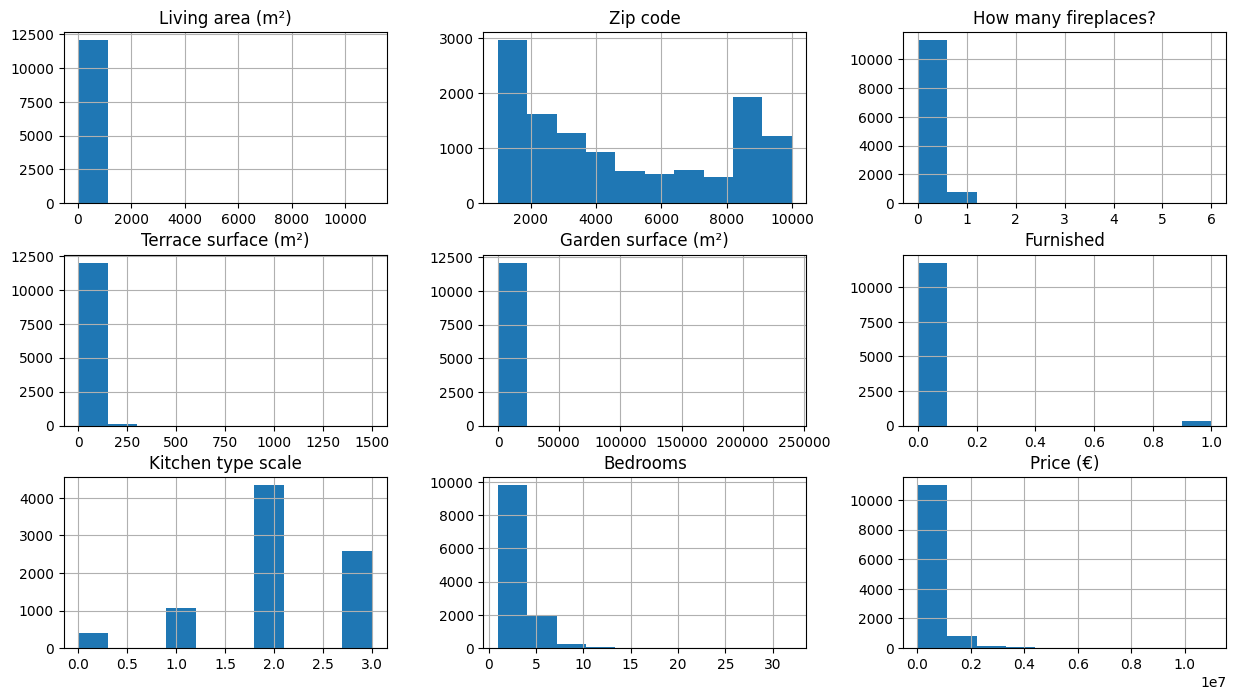

In [315]:
train_data.hist(figsize=(15, 8))

In [316]:
train_data.corr()

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Price (€)
Living area (m²),1.000000,-0.060779,0.143954,0.097315,0.107228,-0.020232,0.043554,0.572743,0.500585
Zip code,-0.060779,1.000000,-0.025178,-0.091320,-0.014939,0.042610,-0.023714,-0.071049,-0.118523
How many fireplaces?,0.143954,-0.025178,1.000000,0.099949,0.038364,-0.015177,0.012343,0.095632,0.119011
Terrace surface (m²),0.097315,-0.091320,0.099949,1.000000,0.048955,0.029262,0.144821,0.097214,0.177549
Garden surface (m²),0.107228,-0.014939,0.038364,0.048955,1.000000,-0.006579,0.010194,0.115780,0.114256
Furnished,-0.020232,0.042610,-0.015177,0.029262,-0.006579,1.000000,0.045981,-0.007105,0.033089
Kitchen type scale,0.043554,-0.023714,0.012343,0.144821,0.010194,0.045981,1.000000,-0.020618,0.237961
Bedrooms,0.572743,-0.071049,0.095632,0.097214,0.115780,-0.007105,-0.020618,1.000000,0.431943
Price (€),0.500585,-0.118523,0.119011,0.177549,0.114256,0.033089,0.237961,0.431943,1.000000


<Axes: >

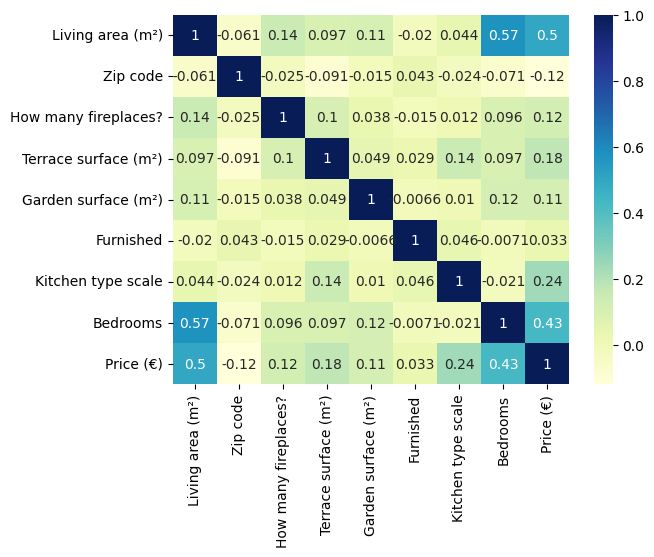

In [317]:
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")

In [318]:
train_data['Terrace surface (m²)'] = np.log(train_data['Terrace surface (m²)'] + 1)
train_data['Garden surface (m²)'] = np.log(train_data['Garden surface (m²)'] + 1)
train_data['Living area (m²)'] = np.log(train_data['Living area (m²)'] + 1)
train_data['How many fireplaces?'] = np.log(train_data['How many fireplaces?'] + 1)
train_data['Furnished'] = np.log(train_data['Furnished'] + 1)
train_data['Bedrooms'] = np.log(train_data['Bedrooms'] + 1)
#train_data['Swimming pool'] = np.log(train_data['Swimming pool'] + 1)




array([[<Axes: title={'center': 'Living area (m²)'}>,
        <Axes: title={'center': 'Zip code'}>,
        <Axes: title={'center': 'How many fireplaces?'}>],
       [<Axes: title={'center': 'Terrace surface (m²)'}>,
        <Axes: title={'center': 'Garden surface (m²)'}>,
        <Axes: title={'center': 'Furnished'}>],
       [<Axes: title={'center': 'Kitchen type scale'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Price (€)'}>]], dtype=object)

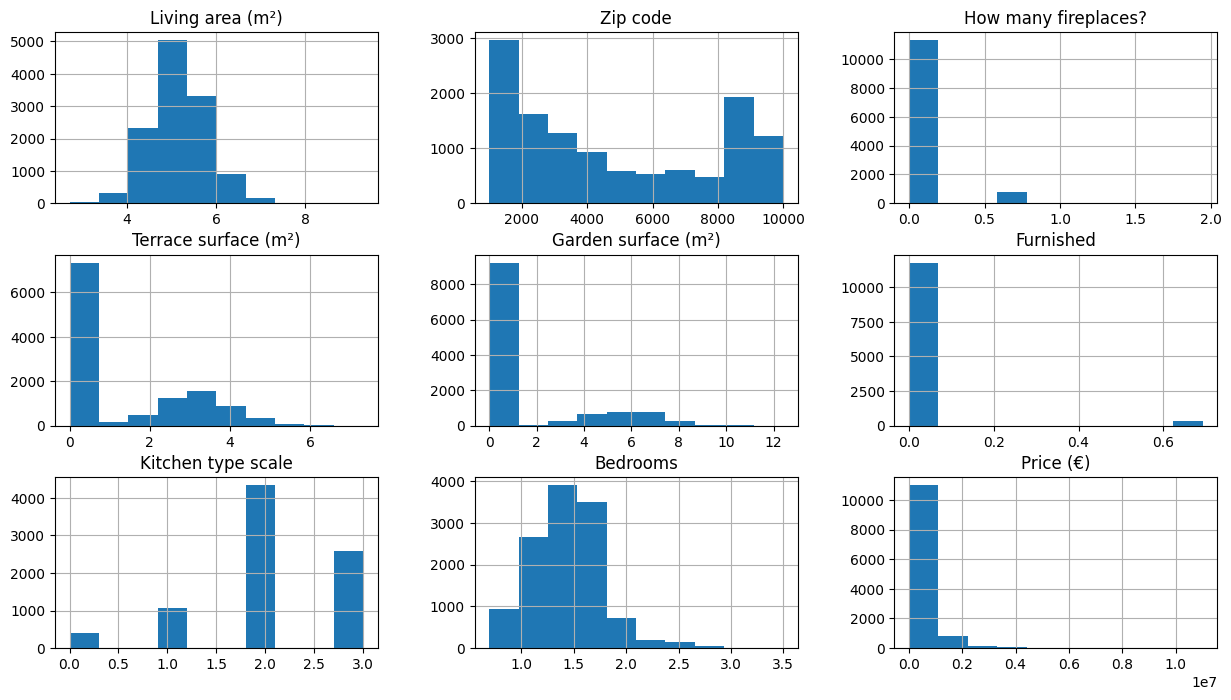

In [319]:
train_data.hist(figsize=(15, 8))

In [320]:
train_data['m2 per room'] = train_data['Living area (m²)'] / train_data['Bedrooms']

<Axes: >

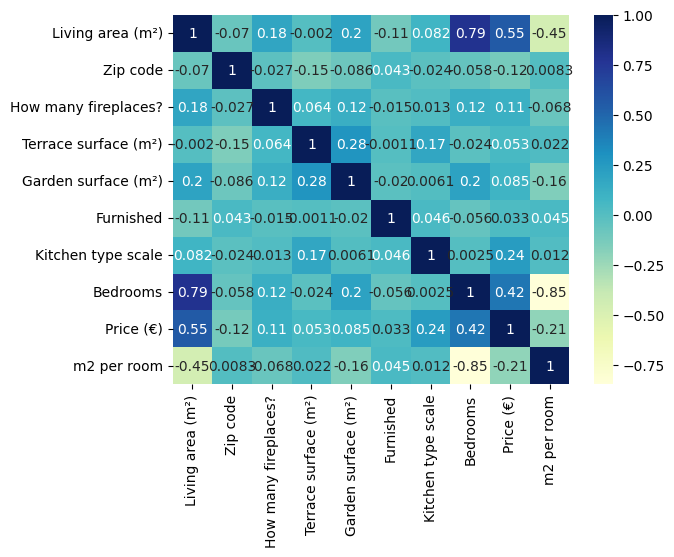

In [321]:
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")

In [322]:
X_train

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms
13445,193.0,8377,0.0,0.0,0.0,0,2.0,4.0
8196,192.0,2000,0.0,0.0,0.0,0,NaN,3.0
1113,189.0,8400,0.0,0.0,0.0,0,NaN,3.0
13132,143.0,9880,0.0,35.0,662.0,0,2.0,4.0
5421,88.0,8300,0.0,0.0,0.0,1,2.0,2.0
...,...,...,...,...,...,...,...,...
10654,445.0,2235,0.0,0.0,0.0,0,3.0,5.0
7095,332.0,8020,0.0,0.0,0.0,0,2.0,4.0
5079,130.0,1390,1.0,0.0,768.0,0,1.0,3.0
11135,152.0,4100,0.0,72.0,714.0,0,NaN,4.0


In [323]:
X_train = train_data[['Living area (m²)','Zip code', 'How many fireplaces?', 'Terrace surface (m²)', 'Garden surface (m²)', 
          'Furnished', 'Kitchen type scale', 'Bedrooms']]
y_train = train_data["Price (€)"]

In [324]:
X_train['Kitchen type scale'] = X_train['Kitchen type scale'].replace(np.nan, 0)
#X_train['Swimming pool'] = X_train['Swimming pool'].replace(np.nan, 0)
X_train

C:\Users\Bevov\AppData\Local\Temp\ipykernel_5696\1901153072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Kitchen type scale'] = X_train['Kitchen type scale'].replace(np.nan, 0)


,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms
13445,5.267858,8377,0.000000,0.000000,0.000000,0.000000,2.0,1.609438
8196,5.262690,2000,0.000000,0.000000,0.000000,0.000000,0.0,1.386294
1113,5.247024,8400,0.000000,0.000000,0.000000,0.000000,0.0,1.386294
13132,4.969813,9880,0.000000,3.583519,6.496775,0.000000,2.0,1.609438
5421,4.488636,8300,0.000000,0.000000,0.000000,0.693147,2.0,1.098612
...,...,...,...,...,...,...,...,...
10654,6.100319,2235,0.000000,0.000000,0.000000,0.000000,3.0,1.791759
7095,5.808142,8020,0.000000,0.000000,0.000000,0.000000,2.0,1.609438
5079,4.875197,1390,0.693147,0.000000,6.645091,0.000000,1.0,1.386294
11135,5.030438,4100,0.000000,4.290459,6.572283,0.000000,0.0,1.609438


In [325]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

In [326]:
test_data

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Price (€),m2 per room
725,0.966273,8954,0.000000,0.863863,0.000000,0.000000,2.0,0.554618,228000,1.742230
13203,1.011537,2018,0.000000,0.000000,0.000000,0.000000,3.0,0.554618,439000,1.823843
8290,1.099042,1300,0.000000,0.000000,0.000000,0.000000,2.0,0.798928,4750000,1.375646
11807,1.016713,1090,0.000000,0.810237,0.000000,0.000000,2.0,0.625800,350000,1.624660
11191,1.080845,6280,0.423036,0.000000,1.121016,0.000000,2.0,0.706395,650000,1.530086
...,...,...,...,...,...,...,...,...,...,...
10454,1.038263,2870,0.000000,0.000000,0.000000,0.000000,2.0,0.625800,449000,1.659096
842,1.011537,3000,0.000000,0.000000,0.000000,0.000000,2.0,0.625800,472500,1.616389
13380,1.094260,8434,0.423036,1.002638,1.056300,0.423036,3.0,0.625800,875000,1.748578
12764,1.014191,4470,0.000000,0.000000,0.000000,0.000000,3.0,0.554618,270000,1.828629


In [327]:

test_data = X_test.join(y_test)

test_data['Terrace surface (m²)'] = np.log(test_data['Terrace surface (m²)'] + 1)
test_data['Garden surface (m²)'] = np.log(test_data['Garden surface (m²)'] + 1)
test_data['Living area (m²)'] = np.log(test_data['Living area (m²)'] + 1)
test_data['How many fireplaces?'] = np.log(test_data['How many fireplaces?'] + 1)
test_data['Furnished'] = np.log(test_data['Furnished'] + 1)
test_data['Bedrooms'] = np.log(test_data['Bedrooms'] + 1)
#test_data['Swimming pool'] = np.log(test_data['Swimming pool'] + 1)






In [333]:
X_test = test_data[['Living area (m²)','Zip code', 'How many fireplaces?', 'Terrace surface (m²)', 'Garden surface (m²)', 
          'Furnished', 'Kitchen type scale', 'Bedrooms']]
y_test = test_data["Price (€)"]

In [334]:
test_data['m2 per room'] = test_data['Living area (m²)'] / test_data['Bedrooms']

From here owerride code


In [335]:
test_data['Kitchen type scale'] = X_test['Kitchen type scale'].replace(np.nan, 0)
#test_data['Swimming pool'] = X_test['Swimming pool'].replace(np.nan, 0)
#X_test = X_test['Kitchen type scale'].replace(np.nan, 0)

In [336]:
test_data

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Price (€),m2 per room
2023,5.081404,1435,0.000000,4.060443,0.000000,0.0,2.0,1.609438,450000,3.157254
1398,4.744932,1330,0.000000,3.433987,7.313887,0.0,2.0,1.098612,550000,4.319023
10161,4.812184,1030,0.000000,3.332205,3.258097,0.0,2.0,1.386294,380000,3.471257
230,5.135798,4000,0.000000,0.000000,0.000000,0.0,0.0,0.693147,274000,7.409391
720,4.653960,8310,0.000000,3.496508,0.000000,0.0,2.0,0.693147,295000,6.714246
...,...,...,...,...,...,...,...,...,...,...
8317,4.330733,5590,0.000000,0.000000,0.000000,0.0,1.0,0.693147,165000,6.247928
13877,4.219508,1390,0.000000,0.000000,0.000000,0.0,0.0,1.098612,225000,3.840761
9861,6.311735,9810,0.693147,0.000000,0.000000,0.0,2.0,1.791759,2200000,3.522646
279,6.304449,9030,0.000000,0.000000,0.000000,0.0,0.0,2.197225,1200000,2.869278


In [343]:
reg.score(X_test, y_test)

0.33513053104826407

In [338]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler

In [339]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
X_test

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms
725,4.094345,8954,0.000000,2.944439,0.000000,0.000000,2.0,1.098612
13203,4.753590,2018,0.000000,0.000000,0.000000,0.000000,3.0,1.098612
8290,6.398595,1300,0.000000,0.000000,0.000000,0.000000,2.0,2.397895
11807,4.836282,1090,0.000000,2.484907,0.000000,0.000000,2.0,1.386294
11191,6.008813,6280,0.693147,0.000000,6.908755,0.000000,2.0,1.791759
...,...,...,...,...,...,...,...,...
10454,5.198497,2870,0.000000,0.000000,0.000000,0.000000,2.0,1.386294
842,4.753590,3000,0.000000,0.000000,0.000000,0.000000,2.0,1.386294
13380,6.293419,8434,0.693147,4.615121,5.525453,0.693147,3.0,1.386294
12764,4.795791,4470,0.000000,0.000000,0.000000,0.000000,3.0,1.098612


In [340]:
forest.score(X_test, y_test)

0.6706620621059921

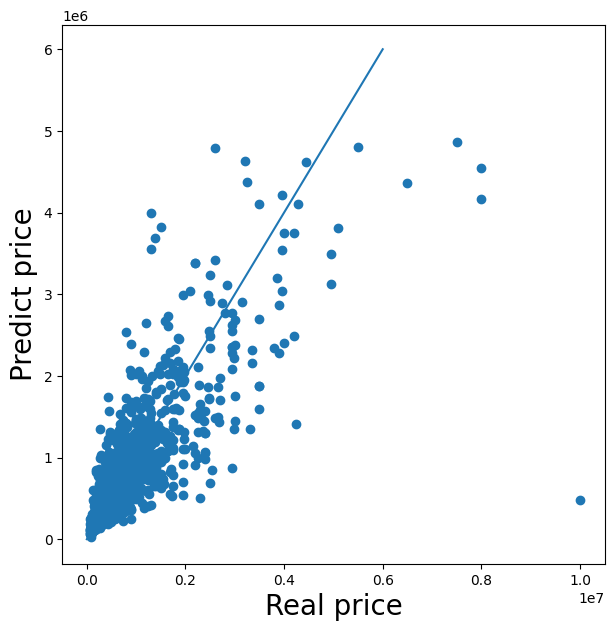

In [342]:
y_pred = forest.predict(X_test)
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred)
# plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Real price', fontsize=20)
plt.ylabel('Predict price', fontsize=20);